Instuctions: Type your code or solution in this notebook by Google Colab. Upload the pdf file onto Blackboard before Jan. 27 (6:15).


Name: Ng Wing Yin

SID：1155127101



# Problem 0

Get the hostname for your colab server.


In [5]:
# Answer
!hostname

0bf146ad3102


# Problem 1

(a) Write a single 'for' loop to define the following matrix.

$$ M= \left[\begin{matrix}
2&3&0&0\\ 
1&2&3&0\\
0&1&2&3\\
0&0&1&2
\end{matrix}\right] $$

In [6]:
#Answer
import numpy as np

M = np.zeros((4, 4))
for i in range(4):
  if i > 0: M[i][i - 1] = 1
  M[i][i] = 2
  if i < 3: M[i][i + 1] = 3
print(M)

[[2. 3. 0. 0.]
 [1. 2. 3. 0.]
 [0. 1. 2. 3.]
 [0. 0. 1. 2.]]


(b) Compute $M^3$

In [7]:
#Answer
print(M @ M @ M)

[[26. 54. 54. 27.]
 [18. 44. 63. 54.]
 [ 6. 21. 44. 54.]
 [ 1.  6. 18. 26.]]


(c) Define a matrix $A=[M \ b]$  

where
$$ b= \left[\begin{matrix}
9\\ 
-1\\
0.5\\
7
\end{matrix}\right] $$

In [8]:
#Answer
b = np.array([[9], [-1], [0.5], [7]])
A = np.hstack((M, b))
print(A)

[[ 2.   3.   0.   0.   9. ]
 [ 1.   2.   3.   0.  -1. ]
 [ 0.   1.   2.   3.   0.5]
 [ 0.   0.   1.   2.   7. ]]


(d) Define the matrix C obtained by slicing row 2 to row 4 and column 2 to column 4 of A.

In [9]:
# Answer
C = A[1:4,1:4]
print(C)

[[2. 3. 0.]
 [1. 2. 3.]
 [0. 1. 2.]]


(e) Solve the equation $Cx=v$ for $x$

where
$$ v= \left[\begin{matrix}
6\\ 
1\\
7
\end{matrix}\right] $$

In [10]:
# Answer
from numpy.linalg import inv
v = np.array([[6], [1], [7]])
x = np.dot(inv(C), v)
print(x)

[[-15.75]
 [ 12.5 ]
 [ -2.75]]


# Problem 2

Without defining the matrix explicitly, write down a one-line command that create the following matrices.

(a)$$U= \left[\begin{matrix}-10&-8&-6&-4&-2\\ 
0&2&4&6&8\\  
\end{matrix}\right] $$

In [11]:
#Answer
U = np.arange(-10, 10, 2).reshape(2, 5)
print(U)

[[-10  -8  -6  -4  -2]
 [  0   2   4   6   8]]


(b) 
$$V= \left[\begin{matrix}3&12&21&30\\ 
6&15&24&33\\ 
9&18&27&36\\ 
\end{matrix}\right] $$

In [12]:
#Answer 
V = np.arange(3, 39, 3).reshape(4, 3).T
print(V)

[[ 3 12 21 30]
 [ 6 15 24 33]
 [ 9 18 27 36]]


# Problem 3

We will learn about the sigmoid function $\sigma(x)=\dfrac{1}{1+e^{-x}}$ later. Please plot the graph of the sigmoid function over the interval $[-10,10]$.

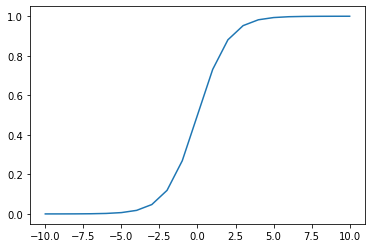

In [13]:
#Answer
import matplotlib.pyplot as plt
x = np.arange(-10, 11)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)

# Problem 4

Write a python code to compute C=A x B and plot a curve of the FLOPS against the
matrix size N (take N=2000, 4000 and 6000) using single precision when the computation is done on a CPU. Do the same on the GPU.


In [15]:
#Answer (part 1)
import time
x = np.arange(2000, 8000, 2000)

y_cpu = []
for N in x:
  A = np.random.rand(N, N)
  B = np.random.rand(N, N)
  t0 = time.time()
  np.dot(A, B)
  t1 = time.time()
  y_cpu.append(2 * (N ** 3) / ((t1 - t0)) / (10 ** 9))

print(y_cpu)

[27.7200536979285, 16.044268202616763, 22.90997515891388]


In [102]:
#Answer (part 2)
import time
x = np.arange(2000, 8000, 2000)

y_gpu = []
for N in x:
  A = np.random.rand(N, N)
  B = np.random.rand(N, N)
  t0 = time.time()
  np.dot(A, B)
  t1 = time.time()
  y_gpu.append(2 * (N ** 3) / ((t1 - t0)) / (10 ** 9))

print(y_gpu)

[29.751821892143276, 34.284774844940635, 34.32204517595363]


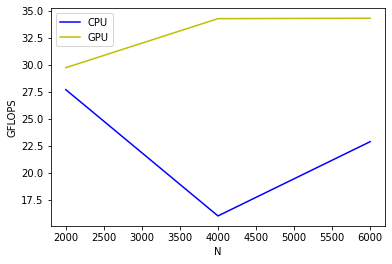

In [16]:
# Answer (part 3)

# Copy by hand
y_cpu = [27.7200536979285, 16.044268202616763, 22.90997515891388]
y_gpu = [29.751821892143276, 34.284774844940635, 34.32204517595363]

# Plot
plt.plot(x, y_cpu, "b-", label="CPU")
plt.plot(x, y_gpu, "y-", label="GPU")
plt.xlabel("N")
plt.ylabel("GFLOPS")
plt.legend()

e.g. you may get a graph like this:

https://drive.google.com/file/d/1yYl18ozmS0vp8Nf_-PCZczq9I1Psdho3/view?usp=sharing
